In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append(os.path.realpath('..'))

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import plotly.express as ex
import plotly.graph_objects as go

from tracking_v2.target import AutopilotTarget, Straight, Turn
from tracking_v2.util import to_df

# Turn

In [17]:
target = AutopilotTarget([Turn(2000, 180)])
trace  = target.true_states()

df     = to_df(np.hstack((np.arange(0, trace.shape[0]).reshape(-1, 1), trace)),
               columns=['t', 'x', 'y', 'z', 'vx', 'vy', 'vz'])
df

,t,x,y,z,vx,vy,vz
0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,1.0,0.055392,-0.000220,-0.000754,1.107835,-0.004393,-0.015086
2,2.0,2.225561,0.046820,-0.016550,3.111710,0.088391,-0.025082
3,3.0,6.371199,0.171881,-0.021355,5.086117,0.142937,-0.014041
4,4.0,12.518012,0.362766,-0.004001,7.098314,0.280371,0.027357
...,...,...,...,...,...,...,...
141,141.0,675.159172,4847.535527,-2.872327,-68.952953,11.532078,0.276386
142,142.0,605.911078,4858.096716,-2.558518,-69.476793,9.672984,0.326822
143,143.0,536.217819,4866.760814,-2.273335,-69.860837,7.701440,0.290717
144,144.0,466.113208,4873.439740,-1.940755,-70.295924,5.736213,0.337971


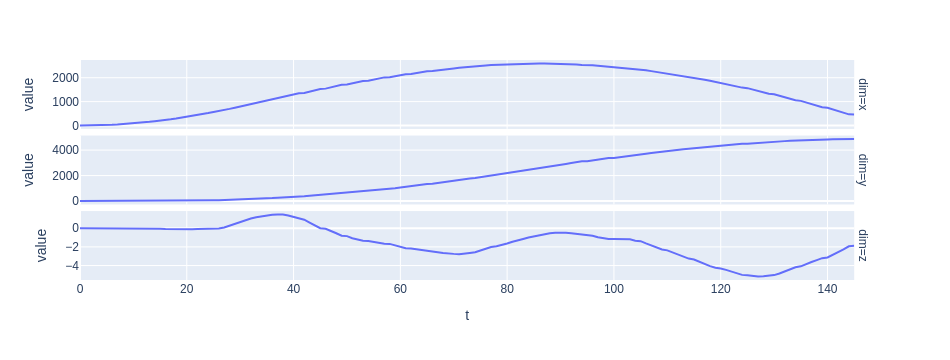

In [18]:
fig = ex.line(df.melt(['t'], ['x', 'y', 'z'], 'dim', 'value'), x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig

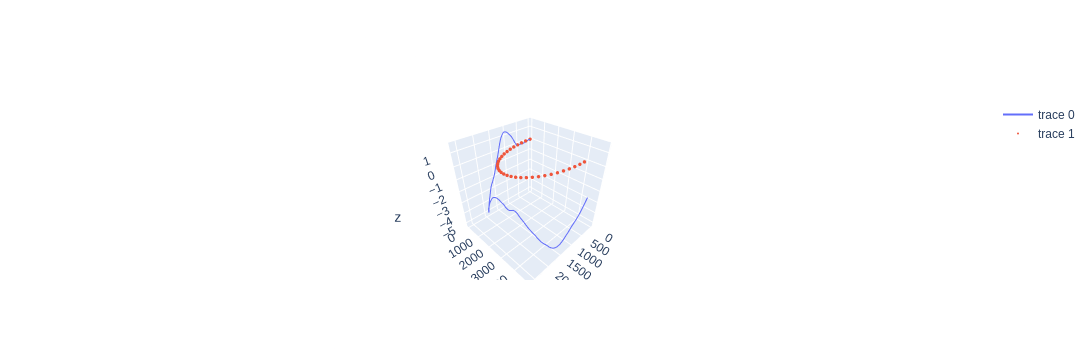

In [19]:
waypoints = np.asarray(target.waypoints)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=trace[:,0], y=trace[:,1], z=trace[:,2], mode='lines'))
fig.add_trace(go.Scatter3d(x=waypoints[:,0], y=waypoints[:,1], z=waypoints[:,2], mode='markers', marker=dict(size=2)))
fig

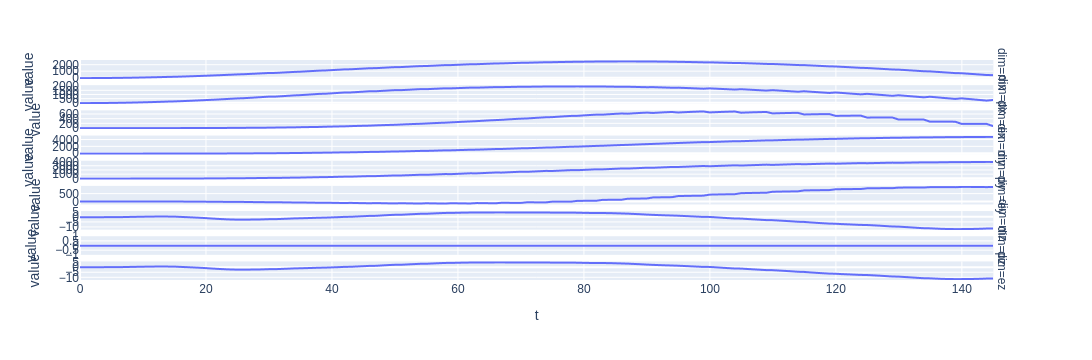

In [20]:
noise_trace    = target.true_states(n=800, only_noise=True)
noise_trace_df = to_df(noise_trace, columns=['mx', 'my', 'mz', 'px', 'py', 'pz', 'ex', 'ey', 'ez'], add_time=True)

fig = ex.line(noise_trace_df.melt(['t'], ['mx', 'px', 'ex', 'my', 'py', 'ey', 'mz', 'pz', 'ez'], 'dim', 'value'),
              x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig.update_layout(height=1100)
fig

# Path

In [8]:
target = AutopilotTarget([Turn(2000, 180), Straight(2000), Turn(2000, 180, False), Straight(2000)])
trace  = target.true_states(n=800)
wps    = np.asarray(target.waypoints)

In [9]:
ex.scatter(x=wps[:,0], y=wps[:,1])

In [10]:
df     = to_df(trace, columns=['x', 'y', 'z', 'vx', 'vy', 'vz'], add_time=True)
df

,t,x,y,z,vx,vy,vz
0,0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,1,0.056082,0.000271,0.000247,1.121636,0.005423,0.004936
2,2,2.258356,0.035403,-0.003000,3.165819,0.085895,0.019584
3,3,6.524957,0.180285,-0.003389,5.245866,0.157069,0.037398
4,4,12.789686,0.410534,0.058690,7.180881,0.258322,0.092848
...,...,...,...,...,...,...,...
336,336,-2348.075070,7798.464574,5.090759,102.404343,65.681585,0.802636
337,337,-2245.174574,7864.881194,5.880100,103.298911,67.147532,0.768389
338,338,-2183.161830,7905.516754,6.312193,103.310874,68.225517,0.636626
339,339,-2079.072460,7974.120181,6.892922,104.841887,68.897918,0.507235


In [11]:
fig = ex.line(df.melt(['t'], ['x', 'y', 'z'], 'dim', 'value'), x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=trace[:,0], y=trace[:,1], z=trace[:,2], mode='lines'))
fig.add_trace(go.Scatter3d(x=wps[:,0], y=wps[:,1], z=wps[:,2], mode='markers', marker=dict(size=2)))
fig

In [13]:
noise_trace    = target.true_states(n=800, only_noise=True)
noise_trace_df = to_df(noise_trace, columns=['mx', 'my', 'mz', 'px', 'py', 'pz', 'ex', 'ey', 'ez'], add_time=True)

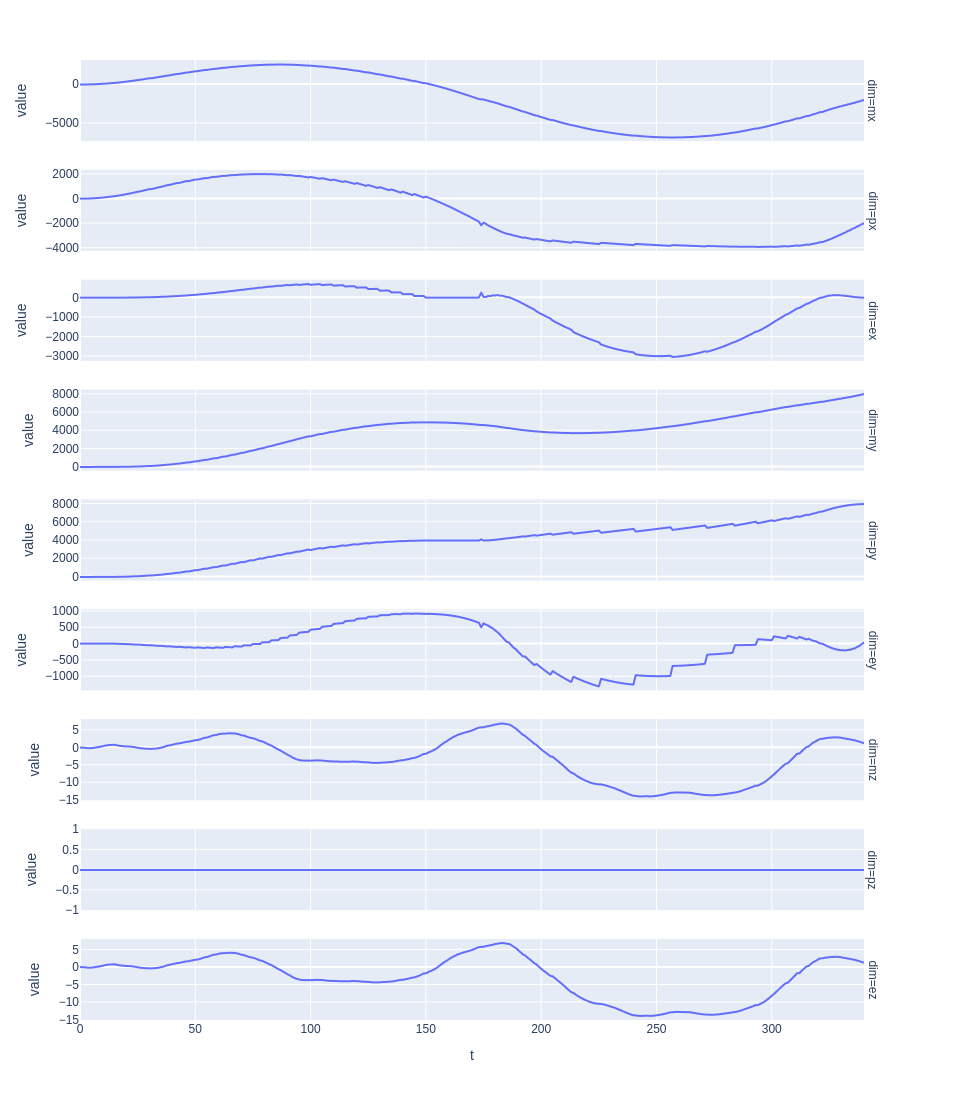

In [14]:
fig = ex.line(noise_trace_df.melt(['t'], ['mx', 'px', 'ex', 'my', 'py', 'ey', 'mz', 'pz', 'ez'], 'dim', 'value'),
              x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig.update_layout(height=1100)
fig

# Path with less noise

In [15]:
target   = AutopilotTarget([Turn(2000, 180), Straight(2000), Turn(2000, 180, False), Straight(2000)], noise_intensity=.1)
trace    = target.true_states(n=800)
trace_df = to_df(trace, columns=['x', 'y', 'z', 'vx', 'vy', 'vz'], add_time=True)

fig = ex.line(trace_df.melt(['t'], ['x', 'y', 'z'], 'dim', 'value'), x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
display(fig)

noise_trace    = target.true_states(n=800, only_noise=True)
noise_trace_df = to_df(noise_trace, columns=['mx', 'my', 'mz', 'px', 'py', 'pz', 'ex', 'ey', 'ez'], add_time=True)

fig = ex.line(noise_trace_df.melt(['t'], ['mx', 'px', 'ex', 'my', 'py', 'ey', 'mz', 'pz', 'ez'], 'dim', 'value'),
              x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig.update_layout(height=1100)
fig

# Path with more noise

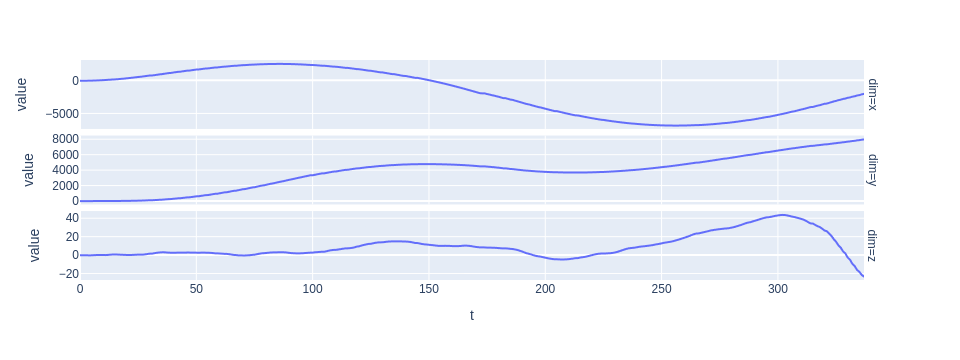

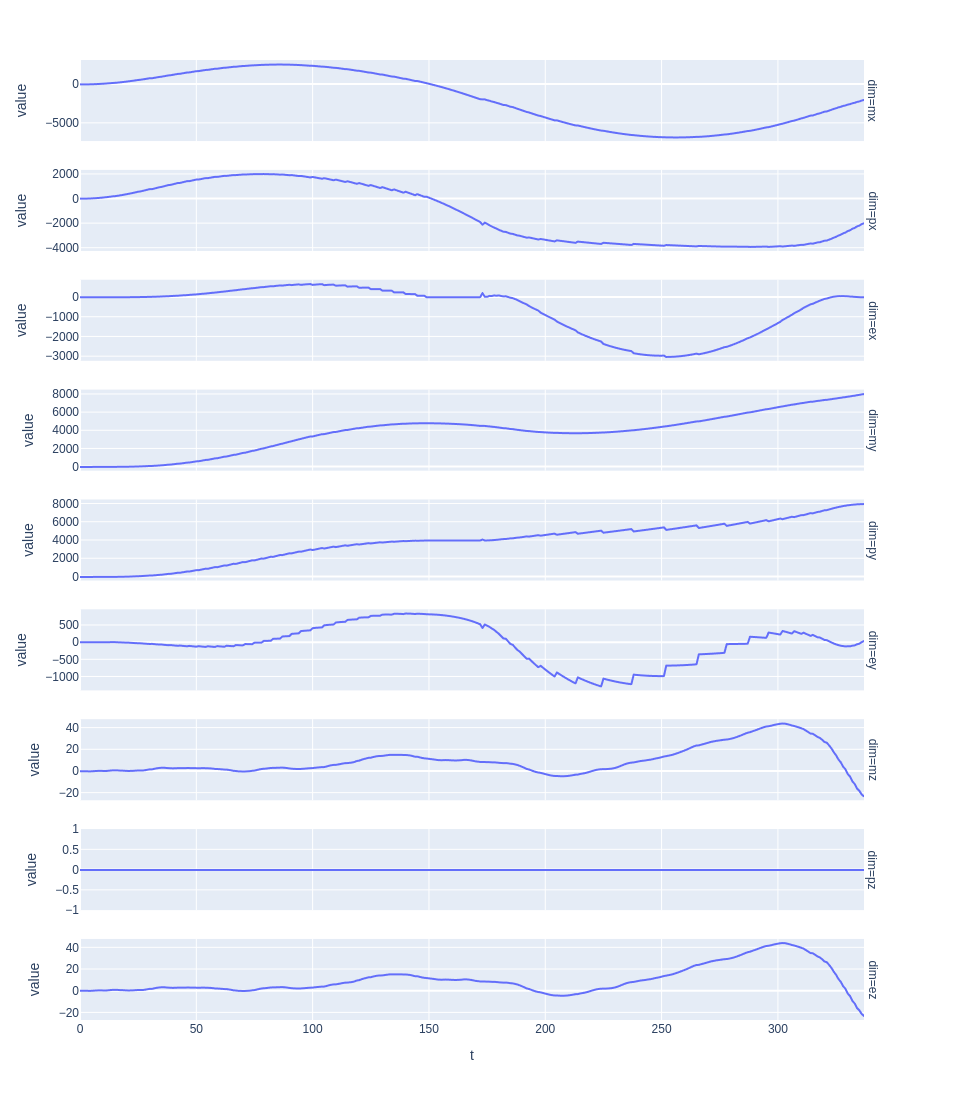

In [16]:
target   = AutopilotTarget([Turn(2000, 180), Straight(2000), Turn(2000, 180, False), Straight(2000)], noise_intensity=10, seed=3)
trace    = target.true_states(n=800)
trace_df = to_df(trace, columns=['x', 'y', 'z', 'vx', 'vy', 'vz'], add_time=True)

fig = ex.line(trace_df.melt(['t'], ['x', 'y', 'z'], 'dim', 'value'), x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
display(fig)

noise_trace    = target.true_states(n=800, only_noise=True)
noise_trace_df = to_df(noise_trace, columns=['mx', 'my', 'mz', 'px', 'py', 'pz', 'ex', 'ey', 'ez'], add_time=True)

fig = ex.line(noise_trace_df.melt(['t'], ['mx', 'px', 'ex', 'my', 'py', 'ey', 'mz', 'pz', 'ez'], 'dim', 'value'),
              x='t', y='value', facet_row='dim')
fig.update_yaxes(matches=None)
fig.update_layout(height=1100)
fig